In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
print(df.dtypes)


Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df["Дата"] = pd.to_datetime(df["Дата"], dayfirst=True, errors="coerce")


Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby("Дата", as_index=False)["Количество"].sum()
print(df_grouped)


         Дата  Количество
0  2018-01-02        3770
1  2018-01-03        3848
2  2018-01-04        3786
3  2018-01-05        4221
4  2018-01-06        4736
..        ...         ...
75 2018-12-04        4103
76 2018-12-05        4883
77 2018-12-06        4837
78 2018-12-07        4290
79 2018-12-08        5667

[80 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [9]:
grouped_df.head()

,Дата,Количество
0,2018-01-02,3770
1,2018-01-03,3848
2,2018-01-04,3786
3,2018-01-05,4221
4,2018-01-06,4736


Нарисуйте график продаж у `grouped_df`

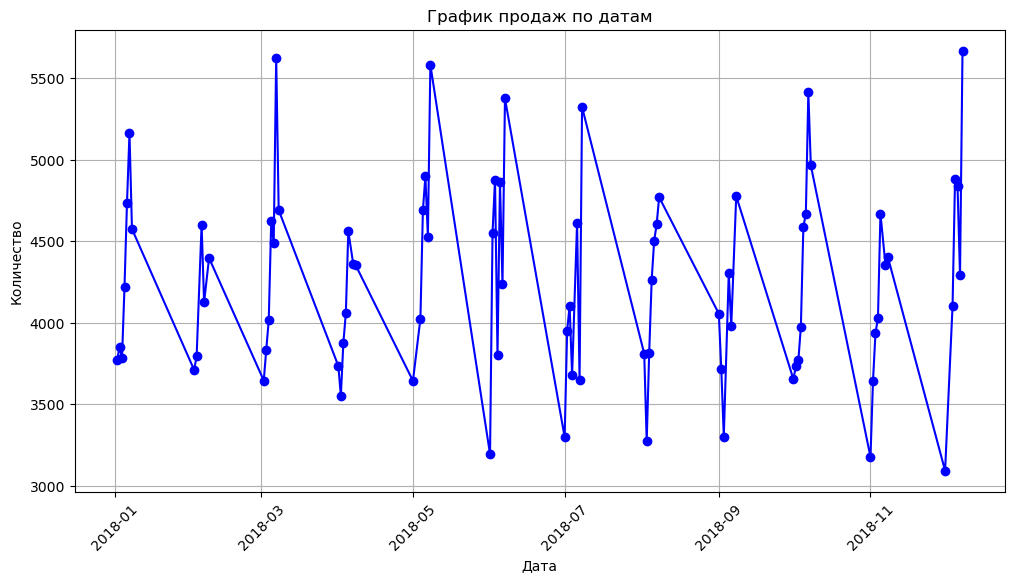

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_grouped["Дата"], df_grouped["Количество"], marker="o", linestyle="-", color="b")
plt.xlabel("Дата")
plt.ylabel("Количество")
plt.title("График продаж по датам")
plt.xticks(rotation=45)
plt.grid()
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

## Есть минимальные продажи в определенный сезон года, скачки и аномалия по продажам

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [14]:
Q1 = df["Количество"].quantile(0.25)
Q3 = df["Количество"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers = df[df["Количество"] > upper_bound]
max_outlier = outliers.loc[outliers["Количество"].idxmax()]

print(max_outlier)


Дата                    NaT
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [17]:
df["Дата"] = pd.to_datetime(df["Дата"])

filtered_df = df[
    (df["Дата"].dt.month.isin([6, 7, 8])) &  # Фильтр по июню, июлю, августу
    (df["Дата"].dt.weekday == 2) &  # Фильтр по средам (0 - понедельник, 2 - среда)
    (df["Склад"] == 3)  # Фильтр по 3 складу
]


top_product = (
    filtered_df.groupby("Номенклатура")["Количество"]
    .sum()
    .idxmax()
)

print("Топовый товар по продажам:", top_product)


Топовый товар по продажам: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [22]:
df_weather = pd.read_csv("weather.csv.gz", compression="gzip", encoding="windows-1251", delimiter=",")





In [29]:
df_weather.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
08.02.2025 08:00,-17.9,745.1,780.6,0.4,85,"Ветер, дующий с севера",1,NaN,NaN,Облаков нет.,...,NaN,4.0,-19.8,Следы осадков,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,45.0,NaN
08.02.2025 05:00,-17.4,744.7,780.1,-0.1,85,"Ветер, дующий с северо-востока",1,NaN,NaN,Облаков нет.,...,NaN,NaN,-19.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08.02.2025 02:00,-17.8,744.8,780.3,0.1,87,"Ветер, дующий с востока",1,NaN,NaN,Облаков нет.,...,NaN,NaN,-19.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_weather = pd.read_csv("weather.csv.gz", sep=";", encoding="ansi", skiprows=6)


Index(['Местное время в Астане', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [30]:
df_weather.columns

Index(['Местное время в Астане', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [31]:
df_weather = df_weather[['Местное время в Астане', 'T']]
df_weather.rename(columns={'Местное время в Астане': 'Дата', 'T': 'Температура'}, inplace=True)


In [32]:
df_weather['Дата'] = pd.to_datetime(df_weather['Дата'], dayfirst=True, errors='coerce')


In [33]:
df_merged = grouped_df.merge(df_weather, on='Дата', how='left')


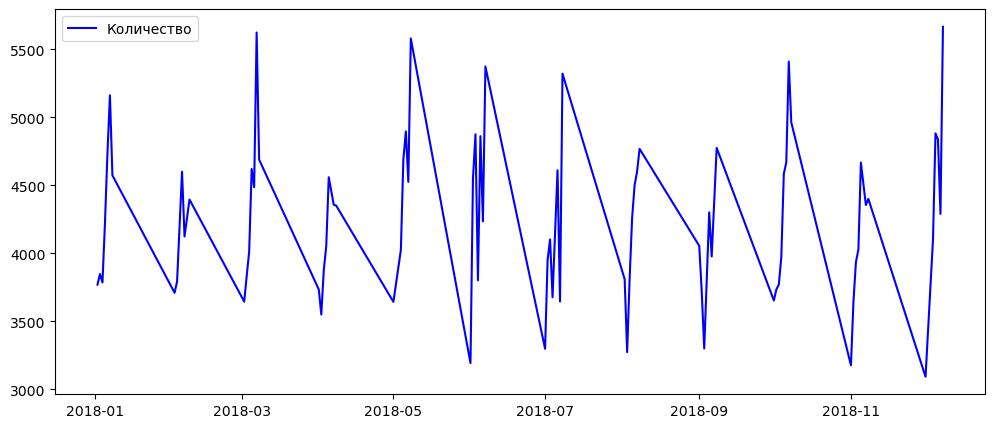

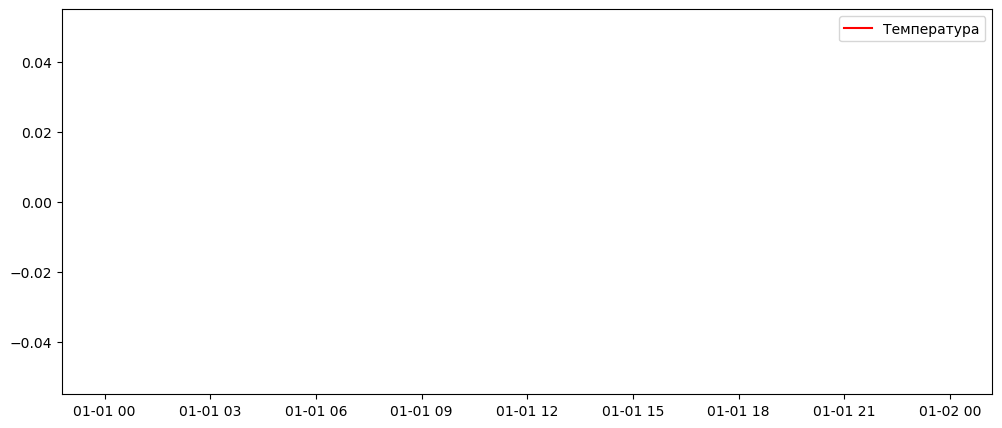

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_merged['Дата'], df_merged['Количество'], label='Количество', color='b')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df_merged['Дата'], df_merged['Температура'], label='Температура', color='r')
plt.legend()
plt.show()
